# Introduction
State notebook purpose here

## Notebook configuration
Configure several notebook configuration settings.

In [1]:
# Disable some warnings

import warnings

warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)
warnings.filterwarnings('ignore', category = FutureWarning)

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Use full screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

## Libraries / Packages
Import several useful packages for the notebook and configure some extra options.

In [6]:
import os
import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("seaborn-whitegrid")

In [3]:
!ls

faireq_501.log        faireq_536.log        fairseq_644_loss.json
faireq_501_loss.json  faireq_536_loss.json  loss_viz.ipynb
faireq_501_loss.txt   fairseq_644.log


In [4]:
TRANSFORMER_PATH   = "fairseq_644_loss.json"
CONVOLUTIONAL_PATH = "faireq_536_loss.json"

In [17]:
def readJson(path):
    with open(path, "r") as f:
        loss = json.load(f)
    return loss

transformer_log   = readJson(TRANSFORMER_PATH)
convolutional_log = readJson(CONVOLUTIONAL_PATH)

In [39]:
transformer_train_loss, transformer_valid_loss = [], []

for i in range(len(transformer_log)):
    if i % 2 == 0:
        transformer_train_loss.append(float(transformer_log[i]["loss"]))
    else:
        transformer_valid_loss.append(float(transformer_log[i]["valid_loss"]))
        
convolutional_train_loss, convolutional_valid_loss = [], []

for i in range(len(convolutional_log)):
    if i % 2 == 0:
        convolutional_train_loss.append(float(convolutional_log[i]["train_loss"]))
    else:
        convolutional_valid_loss.append(float(convolutional_log[i]["valid_loss"]))

<Figure size 1728x720 with 0 Axes>

([<matplotlib.axis.XTick at 0x1263ac150>,
 <a list of 10 Text xticklabel objects>)

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Cross Entropy Loss')

([<matplotlib.axis.XTick at 0x126725310>,
 <a list of 10 Text xticklabel objects>)

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Cross Entropy Loss')

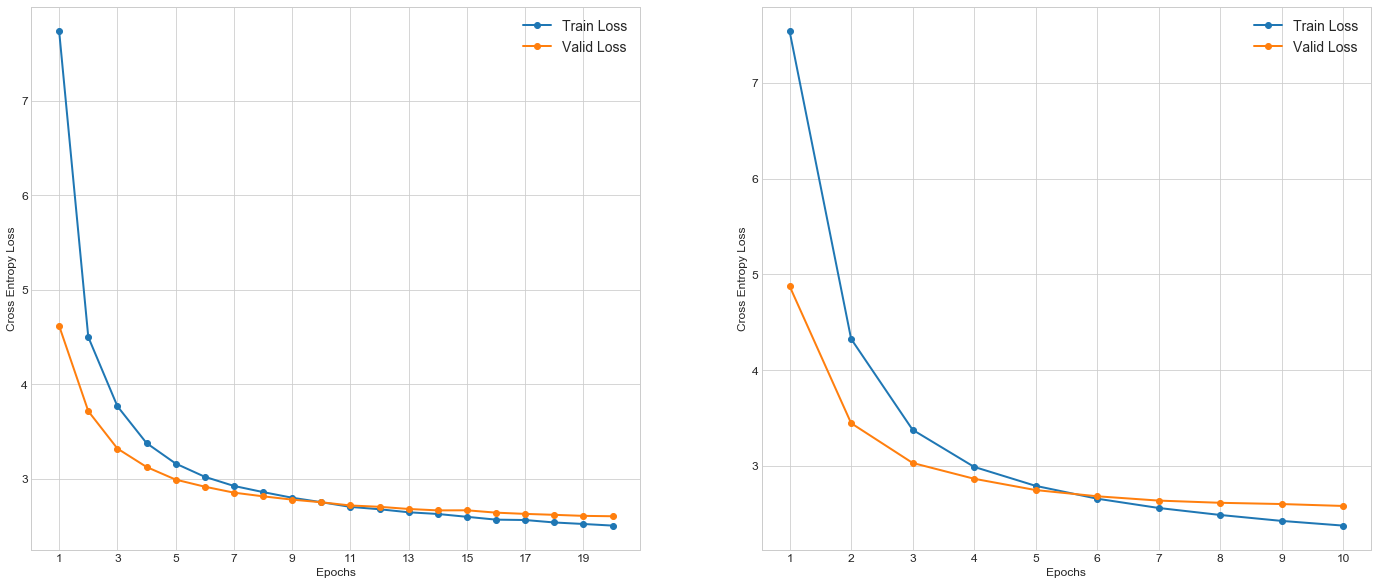

In [75]:
plt.figure(figsize=(24, 10))

# Transformer model
plt.subplot(1, 2, 1)
x  = np.arange(1, len(transformer_train_loss) + 1, 1.)
y1 = np.array(transformer_train_loss)
y2 = np.array(transformer_valid_loss)
plt.plot(x, transformer_train_loss, lw=2, marker="o", label="Train Loss")
plt.plot(x, transformer_valid_loss, lw=2, marker="o", label="Valid Loss")

plt.xticks(np.arange(1., 21., 2.), fontsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.legend(prop={"size" : 14})
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Cross Entropy Loss", fontsize=12)

# Convolutional model
plt.subplot(1, 2, 2)
x  = np.arange(1, len(convolutional_train_loss) + 1, 1.)
y1 = np.array(convolutional_train_loss)
y2 = np.array(convolutional_valid_loss)
plt.plot(x, convolutional_train_loss, lw=2, marker="o", label="Train Loss")
plt.plot(x, convolutional_valid_loss, lw=2, marker="o", label="Valid Loss")

plt.xticks(np.arange(1., 11., 1.), fontsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Cross Entropy Loss", fontsize=12)
plt.legend(prop={"size" : 14})

plt.show()